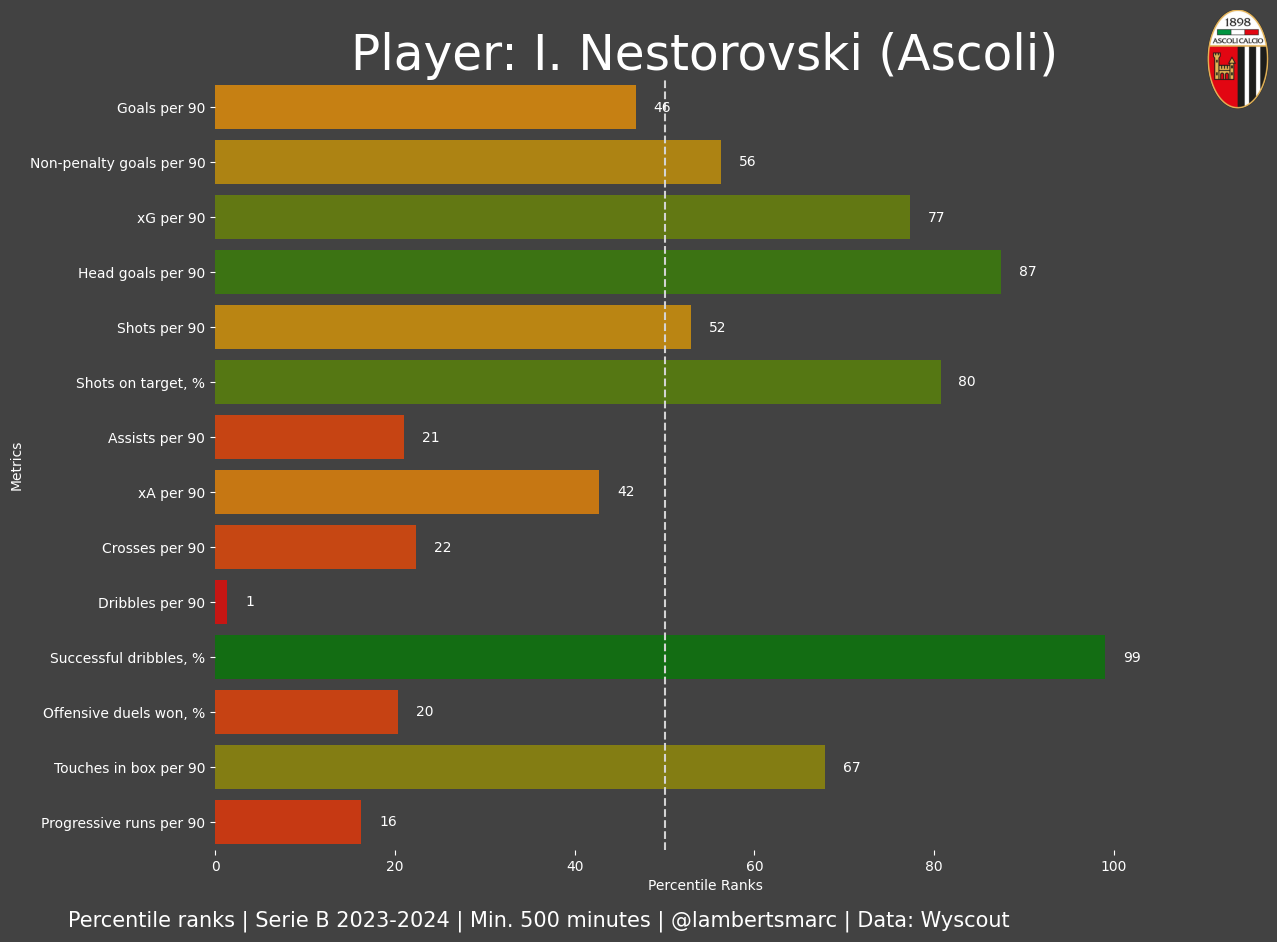

In [67]:
import pandas as pd
from scipy.stats import rankdata
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the Excel file into a DataFrame
df = pd.read_excel('/Users/marclambertes/Downloads/Database Men 2023-2024/Italy Serie B - 2023-2024.xlsx')
# Drop rows with any NaN values
#df = df.dropna(how='any')

#df.reset_index(drop=True, inplace=True)  # Reset the index after filtering

df = df[df['Position'].notna()]  # Exclude rows with empty values in the "Position" column
df = df[df['Position'].str.contains('CF')]
df = df[df['Minutes played'] >= 500]
df.reset_index(drop=True, inplace=True)  # Reset the index after filtering

# Filter data for the specific player
player_name = 'I. Nestorovski'
player_df = df[df['Player'] == player_name]

# Define the desired order of metrics
metrics = ['Goals per 90', 'Non-penalty goals per 90', 'xG per 90', 'Head goals per 90', 'Shots per 90', 'Shots on target, %',
           'Assists per 90', 'xA per 90', 'Crosses per 90', 'Dribbles per 90', 'Successful dribbles, %', 'Offensive duels won, %',
           'Touches in box per 90', 'Progressive runs per 90']

# Calculate percentile ranks for each metric
percentile_ranks = {}
for metric in metrics:
    percentile_ranks[metric] = rankdata(df[metric], method='average') / len(df) * 99

# Define colors and create a colormap
colors = ['red', 'orange', 'green']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a bar graph with black background and facecolor
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#424242')
ax.set_facecolor('#424242')

for i, metric in enumerate(metrics):
    metric_value = player_df[metric].values[0]
    percentile_rank = percentile_ranks[metric][player_df.index[0]]
    color = cmap(percentile_rank / 99)  # Assign color based on percentile rank
  # Assign color based on percentile rank
    bar = ax.barh(i, percentile_rank, alpha=0.7, color=color)
    ax.text(
        bar[0].get_width() + 2, bar[0].get_y() + bar[0].get_height() / 2, f'{int(percentile_rank)}', va='center', ha='left',
        color='white'  # Set the text color to white
    )

ax.axvline(50, color='lightgrey', linestyle='--', label='50th Percentile Rank')

ax.set_ylim(len(metrics) - 0.5, -0.5)
ax.set_yticks(range(len(metrics)))
ax.set_yticklabels(metrics, color='white')  # Set the tick labels color to white

max_percentile_rank = max([max(percentile_ranks[metric]) for metric in metrics])
ax.set_xlim(0, max_percentile_rank + 10)

ax.set_xlabel('Percentile Ranks', color='white')
ax.set_ylabel('Metrics', color='white')
ax.set_yticklabels(metrics, color='white')  # Set the tick labels color to white


team_name = player_df['Team within selected timeframe'].values[0]
ax.set_title('Player: {} ({})'.format(player_name, team_name), fontsize=35, color='white')

logo_path = '/Users/marclambertes/Downloads/Images/{}.png'.format(team_name)
team_logo = plt.imread(logo_path)
logo_ax = fig.add_axes([0.88, 0.85, 0.1, 0.1])
logo_ax.imshow(team_logo)
logo_ax.axis('off')

ax.legend().remove()

ax.text(
    -0.15,
    -0.10,
    "\nPercentile ranks | Serie B 2023-2024 | Min. 500 minutes | @lambertsmarc | Data: Wyscout",
    transform=ax.transAxes,
    fontsize=15,
    color='white'  # Set the text color to white
)

ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['bottom'].set_visible(False)  # Hide the bottom spine
ax.spines['left'].set_visible(False)  # Hide the left spine

ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')

plt.subplots_adjust(left=0.2)


# Save the plot as PNG with transparent background
#plt.savefig('/Users/marclambertes/Desktop/MFF/Project striker/Percentile bar graphs/Eerste Divisie/{}.png'.format(player_name), dpi=500, facecolor="#424242")
plt.savefig('/Users/marclambertes/Downloads/{}.png'.format(player_name), dpi=500, facecolor="#424242")

plt.show()

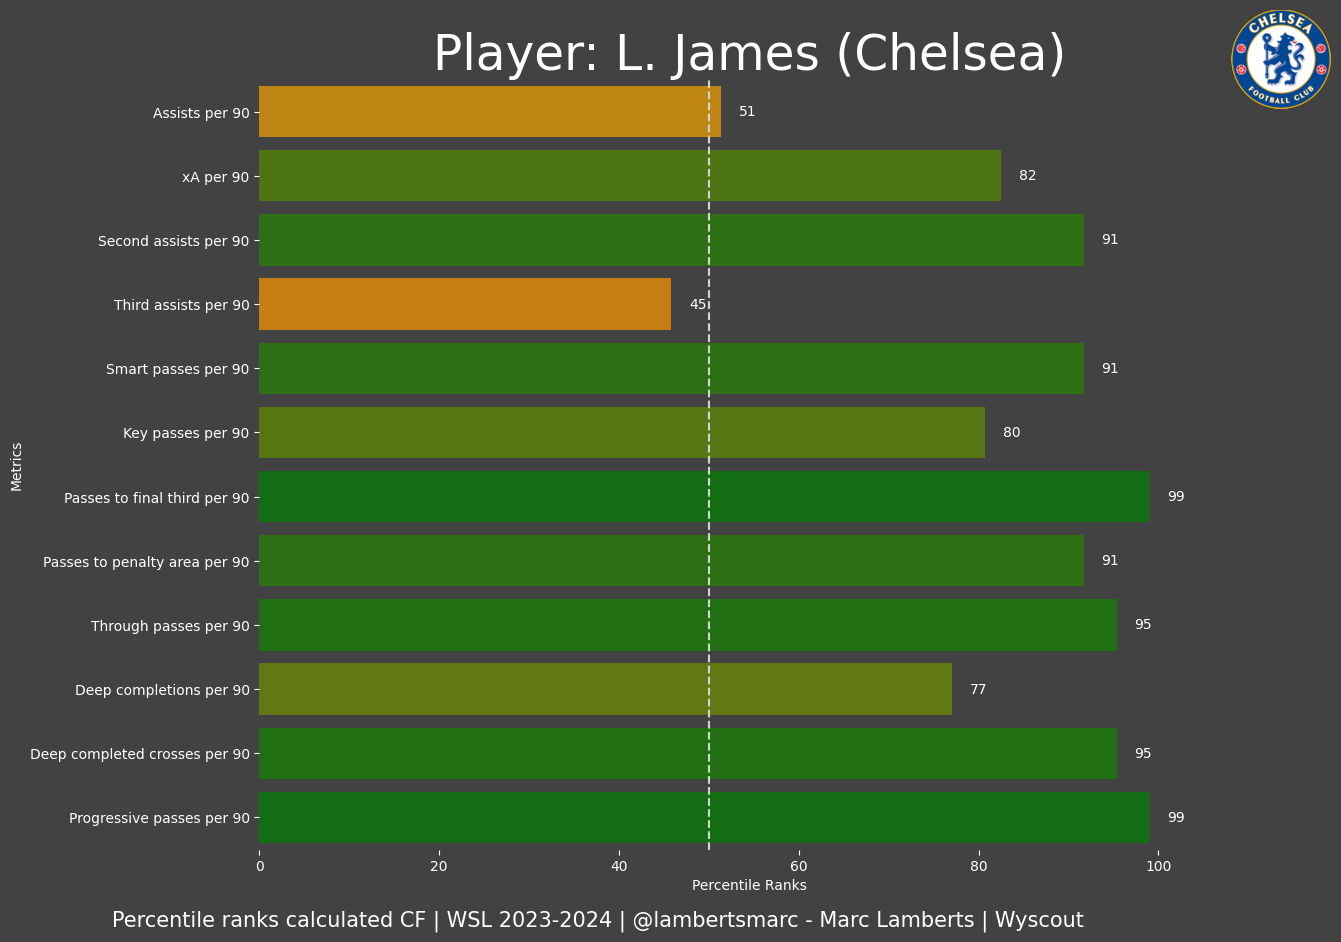

In [2]:
import pandas as pd
from scipy.stats import rankdata
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the Excel file into a DataFrame
df = pd.read_excel('/Users/marclambertes/Downloads/Search results (2).xlsx')
# Drop rows with any NaN values
#df = df.dropna(how='any')

#df.reset_index(drop=True, inplace=True)  # Reset the index after filtering

df = df[df['Position'].notna()]  # Exclude rows with empty values in the "Position" column
df = df[df['Position'].str.contains('CF')]
df = df[df['Minutes played'] >= 500]
df.reset_index(drop=True, inplace=True)  # Reset the index after filtering

# Filter data for the specific player
player_name = 'L. James'
player_df = df[df['Player'] == player_name]

# Define the desired order of metrics
metrics = ['Assists per 90', 'xA per 90','Second assists per 90', 'Third assists per 90', 'Smart passes per 90', 'Key passes per 90', 'Passes to final third per 90', 'Passes to penalty area per 90',
           'Through passes per 90', 'Deep completions per 90', 'Deep completed crosses per 90', 'Progressive passes per 90']

# Calculate percentile ranks for each metric
percentile_ranks = {}
for metric in metrics:
    percentile_ranks[metric] = rankdata(df[metric], method='average') / len(df) * 99

# Define colors and create a colormap
colors = ['red', 'orange', 'green']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a bar graph with black background and facecolor
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#424242')
ax.set_facecolor('#424242')

for i, metric in enumerate(metrics):
    metric_value = player_df[metric].values[0]
    percentile_rank = percentile_ranks[metric][player_df.index[0]]
    color = cmap(percentile_rank / 99)  # Assign color based on percentile rank
  # Assign color based on percentile rank
    bar = ax.barh(i, percentile_rank, alpha=0.7, color=color)
    ax.text(
        bar[0].get_width() + 2, bar[0].get_y() + bar[0].get_height() / 2, f'{int(percentile_rank)}', va='center', ha='left',
        color='white'  # Set the text color to white
    )

ax.axvline(50, color='lightgrey', linestyle='--', label='50th Percentile Rank')

ax.set_ylim(len(metrics) - 0.5, -0.5)
ax.set_yticks(range(len(metrics)))
ax.set_yticklabels(metrics, color='white')  # Set the tick labels color to white

max_percentile_rank = max([max(percentile_ranks[metric]) for metric in metrics])
ax.set_xlim(0, max_percentile_rank + 10)

ax.set_xlabel('Percentile Ranks', color='white')
ax.set_ylabel('Metrics', color='white')
ax.set_yticklabels(metrics, color='white')  # Set the tick labels color to white


team_name = player_df['Team within selected timeframe'].values[0]
ax.set_title('Player: {} ({})'.format(player_name, team_name), fontsize=35, color='white')

logo_path = '/Users/marclambertes/Downloads/Images/{}.png'.format(team_name)
team_logo = plt.imread(logo_path)
logo_ax = fig.add_axes([0.88, 0.85, 0.1, 0.1])
logo_ax.imshow(team_logo)
logo_ax.axis('off')

ax.legend().remove()

ax.text(
    -0.15,
    -0.10,
    'Percentile ranks calculated CF | WSL 2023-2024 | @lambertsmarc - Marc Lamberts | Wyscout',
    transform=ax.transAxes,
    fontsize=15,
    color='white'  # Set the text color to white
)

ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['bottom'].set_visible(False)  # Hide the bottom spine
ax.spines['left'].set_visible(False)  # Hide the left spine

ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')

plt.subplots_adjust(left=0.2)


# Save the plot as PNG with transparent background
plt.savefig('/Users/marclambertes/Downloads/{} passing.png'.format(player_name), dpi=500, facecolor="#424242")

plt.show()

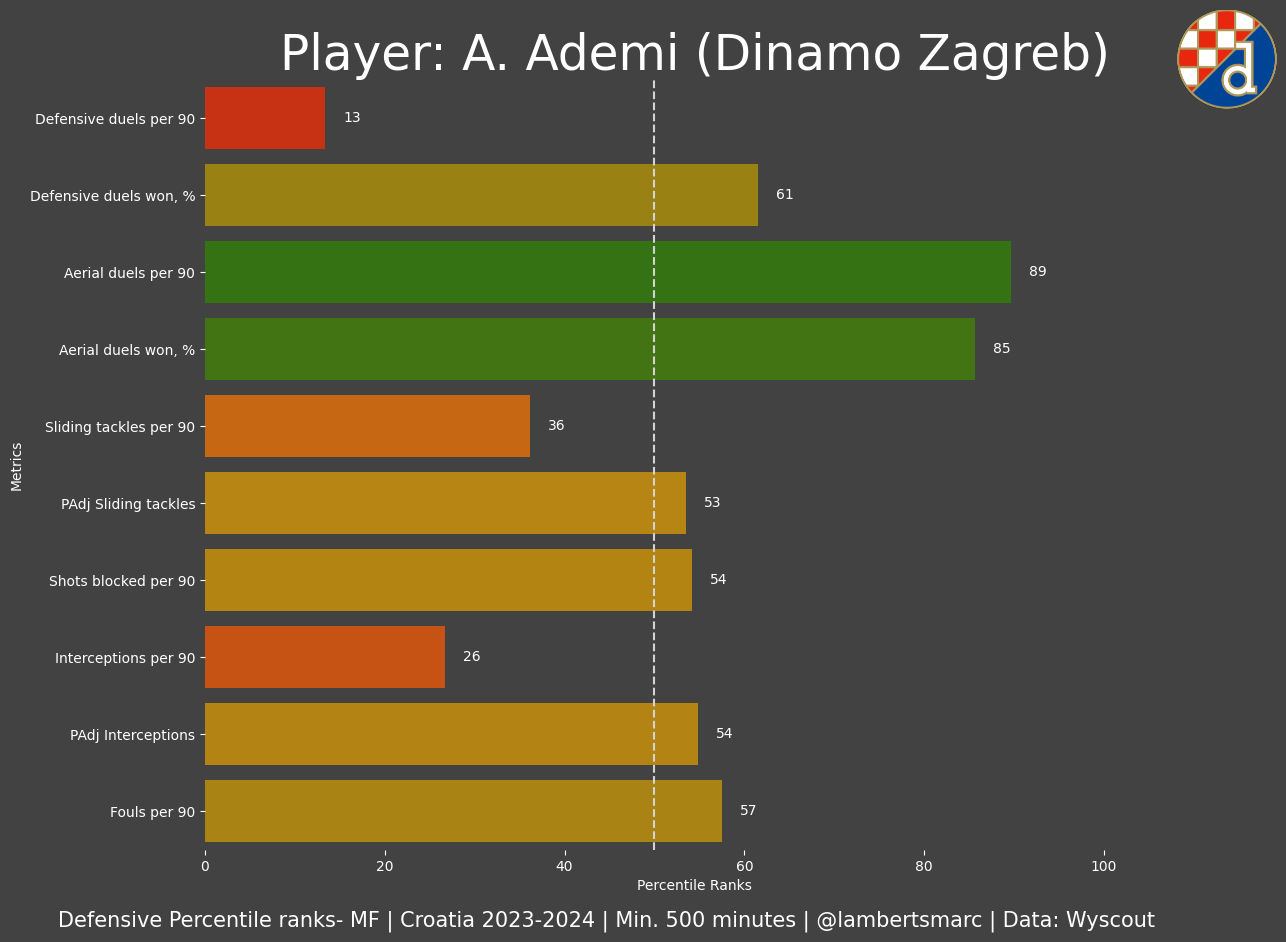

In [56]:
import pandas as pd
from scipy.stats import rankdata
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the Excel file into a DataFrame
df = pd.read_excel('/Users/marclambertes/Downloads/Database Men 2023-2024/Croatia - 2023-2024.xlsx')
# Drop rows with any NaN values
#df = df.dropna(how='any')

#df.reset_index(drop=True, inplace=True)  # Reset the index after filtering

df = df[df['Position'].notna()]  # Exclude rows with empty values in the "Position" column
df = df[df['Position'].str.contains('MF')]
df = df[df['Minutes played'] >= 500]
df.reset_index(drop=True, inplace=True)  # Reset the index after filtering

# Filter data for the specific player
player_name = 'A. Ademi'
player_df = df[df['Player'] == player_name]

# Define the desired order of metrics
metrics = ['Defensive duels per 90', 'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %', 
           'Sliding tackles per 90', 'PAdj Sliding tackles','Shots blocked per 90', 'Interceptions per 90',
           'PAdj Interceptions','Fouls per 90']

# Calculate percentile ranks for each metric
percentile_ranks = {}
for metric in metrics:
    percentile_ranks[metric] = rankdata(df[metric], method='average') / len(df) * 99

# Define colors and create a colormap
colors = ['red', 'orange', 'green']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a bar graph with black background and facecolor
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#424242')
ax.set_facecolor('#424242')

for i, metric in enumerate(metrics):
    metric_value = player_df[metric].values[0]
    percentile_rank = percentile_ranks[metric][player_df.index[0]]
    color = cmap(percentile_rank / 99)  # Assign color based on percentile rank
  # Assign color based on percentile rank
    bar = ax.barh(i, percentile_rank, alpha=0.7, color=color)
    ax.text(
        bar[0].get_width() + 2, bar[0].get_y() + bar[0].get_height() / 2, f'{int(percentile_rank)}', va='center', ha='left',
        color='white'  # Set the text color to white
    )

ax.axvline(50, color='lightgrey', linestyle='--', label='50th Percentile Rank')

ax.set_ylim(len(metrics) - 0.5, -0.5)
ax.set_yticks(range(len(metrics)))
ax.set_yticklabels(metrics, color='white')  # Set the tick labels color to white

max_percentile_rank = max([max(percentile_ranks[metric]) for metric in metrics])
ax.set_xlim(0, max_percentile_rank + 10)

ax.set_xlabel('Percentile Ranks', color='white')
ax.set_ylabel('Metrics', color='white')
ax.set_yticklabels(metrics, color='white')  # Set the tick labels color to white


team_name = player_df['Team within selected timeframe'].values[0]
ax.set_title('Player: {} ({})'.format(player_name, team_name), fontsize=35, color='white')

logo_path = '/Users/marclambertes/Downloads/Images/{}.png'.format(team_name)
team_logo = plt.imread(logo_path)
logo_ax = fig.add_axes([0.88, 0.85, 0.1, 0.1])
logo_ax.imshow(team_logo)
logo_ax.axis('off')

ax.legend().remove()

ax.text(
    -0.15,
    -0.10,
    "\nDefensive Percentile ranks- MF | Croatia 2023-2024 | Min. 500 minutes | @lambertsmarc | Data: Wyscout",
    transform=ax.transAxes,
    fontsize=15,
    color='white'  # Set the text color to white
)

ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['bottom'].set_visible(False)  # Hide the bottom spine
ax.spines['left'].set_visible(False)  # Hide the left spine

ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')

plt.subplots_adjust(left=0.2)


# Save the plot as PNG with transparent background
#plt.savefig('/Users/marclambertes/Desktop/MFF/Project striker/Percentile bar graphs/Eerste Divisie/{}.png'.format(player_name), dpi=500, facecolor="#424242")
plt.savefig('/Users/marclambertes/Downloads/{} defensive.png'.format(player_name), dpi=500, facecolor="#424242")

plt.show()

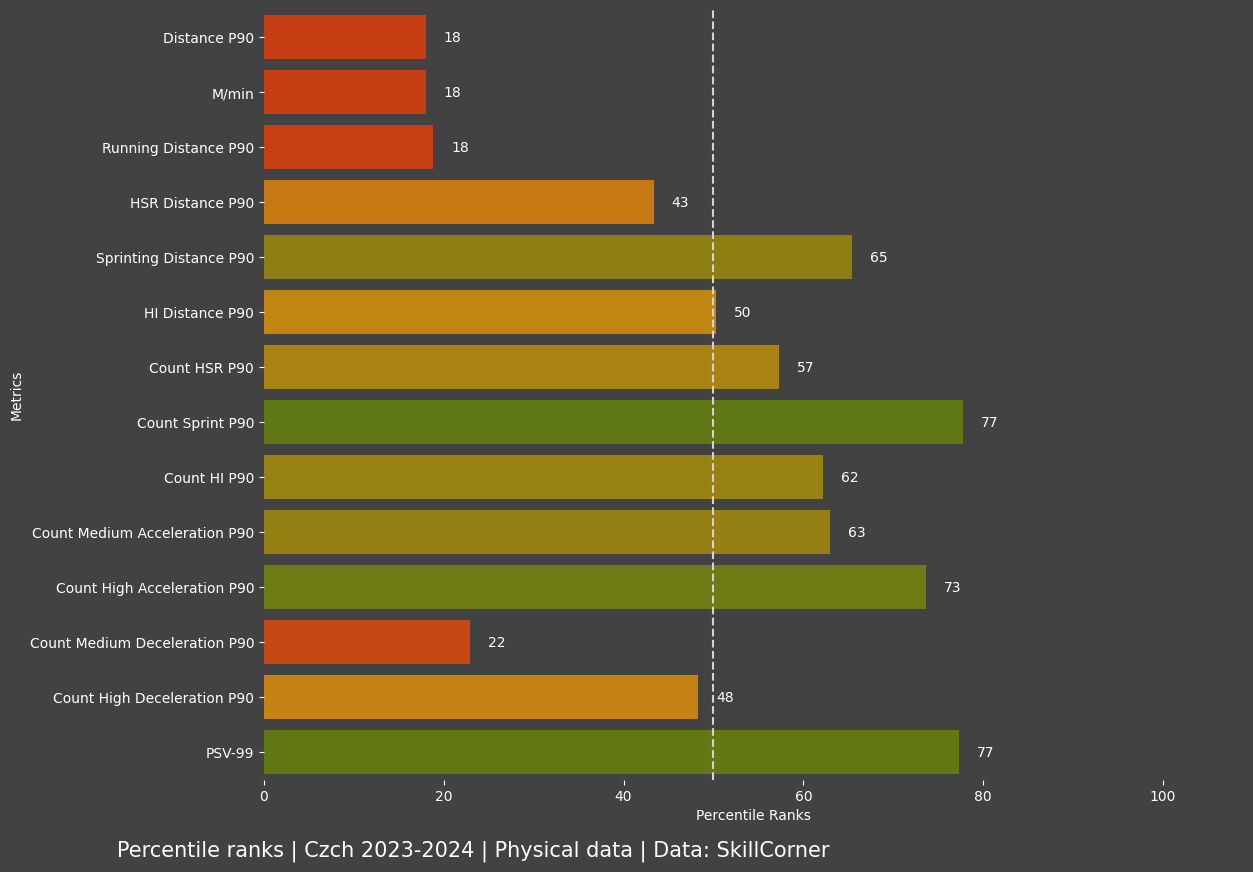

In [8]:
import pandas as pd
from scipy.stats import rankdata
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the Excel file into a DataFrame
df = pd.read_csv('/Users/marclambertes/Downloads/SkillCorner-2024-01-24 (1).csv', sep=';')

# Filter data for the specific player
player_name = 'Ladislav Krejčí'
player_df = df[df['Player'] == player_name]

# Define the desired order of metrics
metrics = ['Distance P90', 'M/min', 'Running Distance P90',
           'HSR Distance P90', 'Sprinting Distance P90', 'HI Distance P90',
           'Count HSR P90', 'Count Sprint P90', 'Count HI P90',
           'Count Medium Acceleration P90', 'Count High Acceleration P90', 'Count Medium Deceleration P90',
           'Count High Deceleration P90', 'PSV-99']

# Calculate percentile ranks for each metric
percentile_ranks = {}
for metric in metrics:
    percentile_ranks[metric] = rankdata(df[metric], method='average') / len(df) * 99

# Define colors and create a colormap
colors = ['red', 'orange', 'green']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a bar graph with black background and facecolor
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#424242')
ax.set_facecolor('#424242')

for i, metric in enumerate(metrics):
    metric_value = player_df[metric].values[0]
    percentile_rank = percentile_ranks[metric][player_df.index[0]]
    color = cmap(percentile_rank / 99)  # Assign color based on percentile rank
    bar = ax.barh(i, percentile_rank, alpha=0.7, color=color)
    ax.text(
        bar[0].get_width() + 2, bar[0].get_y() + bar[0].get_height() / 2, f'{int(percentile_rank)}', va='center', ha='left',
        color='white'  # Set the text color to white
    )

ax.axvline(50, color='lightgrey', linestyle='--', label='50th Percentile Rank')

ax.set_ylim(len(metrics) - 0.5, -0.5)
ax.set_yticks(range(len(metrics)))
ax.set_yticklabels(metrics, color='white')  # Set the tick labels color to white

max_percentile_rank = max([max(percentile_ranks[metric]) for metric in metrics])
ax.set_xlim(0, max_percentile_rank + 10)

ax.set_xlabel('Percentile Ranks', color='white')
ax.set_ylabel('Metrics', color='white')
ax.set_yticklabels(metrics, color='white')  # Set the tick labels color to white

ax.legend().remove()

ax.text(
    -0.15,
    -0.10,
    "\nPercentile ranks | Czch 2023-2024 | Physical data | Data: SkillCorner",
    transform=ax.transAxes,
    fontsize=15,
    color='white'  # Set the text color to white
)

ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.spines['bottom'].set_visible(False)  # Hide the bottom spine
ax.spines['left'].set_visible(False)  # Hide the left spine

ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')

plt.subplots_adjust(left=0.2)

# Save the plot as PNG with transparent background
plt.savefig('/Users/marclambertes/Downloads/{}.png'.format(player_name), dpi=500, facecolor="#424242")

plt.show()


In [5]:
print(df.columns)


Index(['Player;"Minutes Played";"Count Performances (PQC passed)";"Count Performances (PQC failed)";"Distance P90";"M/min";"Running Distance P90";"HSR Distance P90";"Sprinting Distance P90";"HI Distance P90";"Count HSR P90";"Count Sprint P90";"Count HI P90";"Count Medium Acceleration P90";"Count High Acceleration P90";"Count Medium Deceleration P90";"Count High Deceleration P90";"PSV-99"'], dtype='object')
